In [399]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef

In [400]:
def init_logistic_regression(x, y):
    return LogisticRegression(max_iter=1000000).fit(x, y)

In [401]:
classCAD = pd.read_csv("./unionMatrix_Class.csv")
Y = np.array(classCAD[["label"]]).ravel()
X = classCAD.drop(["label", "sample_ID"], axis = 1)
X = (X - X.mean()) / X.std()
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [402]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [403]:
regression = init_logistic_regression(x_train, y_train)

In [404]:
regression.score(x_test, y_test)

0.5015479876160991

In [405]:
matthews_corrcoef(regression.predict(x_test), y_test)

0.08459943768186177

In [406]:
import matplotlib.pyplot as plt

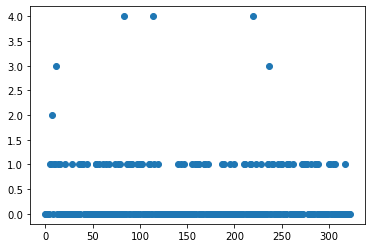

In [407]:
plt.scatter(range(len(y_test)), regression.predict(x_test))

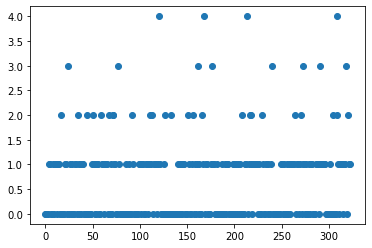

In [408]:
plt.scatter(range(len(y_test)), y_test)

In [409]:
regression.coef_

array([[ 1.01068495e-01, -6.66792073e-02,  6.30027376e-02,
         1.82314602e-01, -3.27314602e-01, -1.74397414e-01,
         1.71681458e-01,  7.26496355e-02,  5.61134664e-02,
         3.13168452e-01,  1.34709261e-01,  2.73808726e-01,
         8.32290154e-02,  1.19367358e-01,  8.83669504e-02,
         1.20935734e-01,  3.55434127e-01,  1.16973758e-01,
         9.69597285e-02, -8.58404875e-03, -3.29800133e-02,
        -1.04310018e-01, -5.23807745e-03,  1.22169636e-01,
         1.91013393e-01,  1.18662299e-01, -1.29176572e-01,
         2.54099033e-01,  1.53583784e-01,  1.11982431e-01,
         1.33635399e-01,  1.87502301e-01, -1.97925297e-01,
         7.52531392e-01,  8.26712118e-02,  1.04344889e-01,
        -1.15840688e+00,  3.30694050e-01],
       [-6.69033977e-02,  1.93932586e-01,  8.16496219e-02,
         6.92987961e-02,  1.85918958e-02, -5.70831466e-02,
        -2.12960542e-01,  1.22275213e-01, -1.51271933e-01,
         4.60910111e-01,  2.31271526e-01, -2.54133436e-01,
         1.41

In [410]:
regression.intercept_

array([ 1.89029947,  1.6860918 , -0.45092449, -1.18899145, -1.93647533])

In [411]:
regression.classes_

array([0, 1, 2, 3, 4], dtype=int64)